## Import Modules

In [1]:
import Tools
import Dataset as ds

import numpy as np
import torch
from ultralytics import settings
from ultralytics import YOLO


## Load Dataset

In [4]:
# Base paths for the images and labels
train_images_path = 'datasets/AVOIDDS/images/train'
train_labels_path = 'datasets/AVOIDDS/labels/train'
val_images_path = 'datasets/AVOIDDS/images/valid'
val_labels_path = 'datasets/AVOIDDS/labels/valid'

# Base path for metadata
metadata_path = 'datasets/AVOIDDS/metadata.json'

# Create the DataFrames for the train and validation sets
train_df = ds.create_dataframe(train_images_path, train_labels_path, metadata_path)
valid_df = ds.create_dataframe(val_images_path, val_labels_path, metadata_path)

#train_df.info()

# Create sub datasets

In [6]:
# TEST - cessna only dataset test

#test_train_df = train_df[(train_df['ac'] == 'Cessna Skyhawk') & (train_df['weather'] == 0)]
#test_valid_df = valid_df[(valid_df['ac'] == 'Cessna Skyhawk') & (valid_df['weather'] == 0)]
#
#dataset_name = 'cessna_only'
#
#ds.create_sub_dataset(dataset_name, test_train_df, test_valid_df)

Removing dataset if pre-existing
Copying training files:


Copying files:   0%|          | 0/7200 [00:00<?, ?it/s]

Copying validation files:


Copying files:   0%|          | 0/800 [00:00<?, ?it/s]

Dataset 'cessna_only' created at datasets/


# Create Augmented Datasets

In [8]:
test_dataset_dir = "datasets/cessna_only"

"""
Methods: 
 - flip
 - rotate
 - bnc
 - histEq
 - whiteBal
 - sharpen
 - gaussian
 - zoom

"""

augmentation_metadata = {
    'methods': {
        'hsv': {
            'parameters': {
                'type': 'h',  # Probability of applying the augmentation
                'shift': 50,
                'p': 1.0
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'flip': {
            'parameters': {
                'orientation': 'h',  # Could be 'h' for horizontal or 'v' for vertical
                'p': 1.0  # Probability of applying the augmentation
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'rotate': {
            'parameters': {
                'angle': 90,  # Rotation angle
                'p': 1.0  # Probability of applying the augmentation
            },
            'apply_to_percentage': 0.1  # 30% of the training images
        },
        'bnc': {
            'parameters': {
                'alpha': 1.5,  # contrast control
                'beta': 50, # brightness control
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'histEq': {
            'parameters': {
                'p': 1.0  # Probability of applying the augmentation
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'whiteBal': {
            'parameters': {
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'sharpen': {
            'parameters': {
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'gaussian': {
            'parameters': {
                'var_limit': (10.0, 50.0) # range of noise varaince
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'zoom': {
            'parameters': {
                'zoom_factor': 3  # Probability of applying the augmentation
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        }       
    }
}

#ds.augment_dataset(test_dataset_dir, augmentation_metadata)

Removing existing directories/files:   0%|          | 0/3 [00:00<?, ?it/s]

Copying files:   0%|          | 0/3600 [00:00<?, ?it/s]

Copying files:   0%|          | 0/3600 [00:00<?, ?it/s]

Applying augmentations:   0%|          | 0/3240 [00:00<?, ?it/s]

An error occurred: Expected y_max for bbox (0.23743350000000002, 0.784257, 0.5908465, 1.019865, 0) to be in the range [0.0, 1.0], got 1.019865.


# Test Augmentation Methods

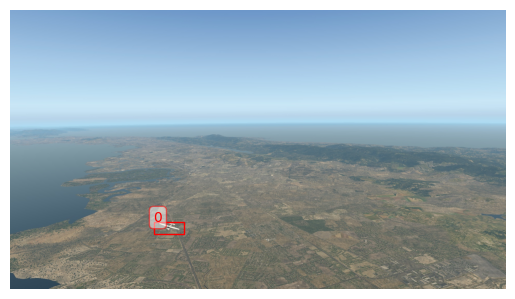

In [7]:
# TEST - block to test aug methods

"""
Methods: 
 - flip
 - rotate
 - bnc
 - gaussian
 - histEq
 - whiteBal
 - sharpen
 - zoom
 - hsv
"""

image = '21'
dataset = 'train-aug'
aug_type = 'flip'


test_image_path = f'datasets/cessna_only/images/{dataset}/{image}.jpg'
test_label_path = f'datasets/cessna_only/labels/{dataset}/{image}.txt'

aug_image_path = f'datasets/cessna_only/images/{dataset}/{image}-{aug_type}.jpg'
aug_label_path = f'datasets/cessna_only/labels/{dataset}/{image}-{aug_type}.txt'

#Tools.overlay_bbox_image(aug_image_path, aug_label_path)

# Yolo Config

In [14]:
# Ultralytics settings
print(settings) 

settings.update({'datasets_dir': 'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/datasets'})
settings.update({'weights_dir': 'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/weights'})
settings.update({'runs_dir': 'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/runs'})

print(settings)

# GPU Utilisation
print(torch.cuda.is_available())
device = torch.device("cuda")


""" Disable Data Augmentation (potentially)
hsv_h: 0.0  # hue
hsv_s: 0.0  # saturation
hsv_v: 0.0  # value
degrees: 0.0  # rotation
translate: 0.0  # translate
scale: 0.0  # scale
shear: 0.0  # shear
perspective: 0.0  # perspective
flipud: 0.0  # flip up-down
fliplr: 0.0  # flip left-right
mosaic: 0.0  # mosaic
mixup: 0.0  # mixup
"""





{'settings_version': '0.0.4', 'datasets_dir': 'C:\\github\\Third Year Project\\Intruder-Aircraft-Detection\\main\\datasets', 'weights_dir': 'C:\\github\\Third Year Project\\Intruder-Aircraft-Detection\\main\\YOLO\\weights', 'runs_dir': 'C:\\github\\Third Year Project\\Intruder-Aircraft-Detection\\main\\YOLO\\runs', 'uuid': 'fdb5c10788ffaa41a9047dc764dd8a0a3287d6bec12c0c66234ac745c0366efa', 'sync': True, 'api_key': '', 'openai_api_key': '', 'clearml': True, 'comet': True, 'dvc': True, 'hub': True, 'mlflow': True, 'neptune': True, 'raytune': True, 'tensorboard': True, 'wandb': True}
{'settings_version': '0.0.4', 'datasets_dir': 'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/datasets', 'weights_dir': 'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/weights', 'runs_dir': 'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/runs', 'uuid': 'fdb5c10788ffaa41a9047dc764dd8a0a3287d6bec12c0c66234ac745c0366efa', 'sync': True, 'api_key': '', 'openai

' Disable Data Augmentation (potentially)\nhsv_h: 0.0  # hue\nhsv_s: 0.0  # saturation\nhsv_v: 0.0  # value\ndegrees: 0.0  # rotation\ntranslate: 0.0  # translate\nscale: 0.0  # scale\nshear: 0.0  # shear\nperspective: 0.0  # perspective\nflipud: 0.0  # flip up-down\nfliplr: 0.0  # flip left-right\nmosaic: 0.0  # mosaic\nmixup: 0.0  # mixup\n'

# Test Parameters

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

_, test_train_df = train_test_split(
    train_df,
    test_size=500,  # Number of items you want in your sample
    stratify=train_df['ac'],  # Stratify based on the combined column
    random_state=42  # Ensures reproducibility
)

_, test_val_df = train_test_split(
    valid_df,
    test_size=100,  # Number of items you want in your sample
    stratify=valid_df['ac'],  # Stratify based on the combined column
    random_state=42  # Ensures reproducibility
)


dataset_name = 'test500'

ds.create_sub_dataset(dataset_name, test_train_df, test_val_df)

Removing dataset if pre-existing
Copying training files:


Copying files:   0%|          | 0/1000 [00:00<?, ?it/s]

Copying validation files:


Copying files:   0%|          | 0/200 [00:00<?, ?it/s]

Dataset 'test500' created at datasets/


In [17]:
augmentation_metadata = {
    'methods': {        
        'flip': {
            'parameters': {
                'orientation': 'h',  # Could be 'h' for horizontal or 'v' for vertical
                'p': 1.0  # Probability of applying the augmentation
            },
            'apply_to_percentage': 0.5  # 50% of the training images
        }        
    }
}


ds.augment_dataset(f'datasets/{dataset_name}', augmentation_metadata)

Removing existing directories/files:   0%|          | 0/3 [00:00<?, ?it/s]

Copying files:   0%|          | 0/500 [00:00<?, ?it/s]

Copying files:   0%|          | 0/500 [00:00<?, ?it/s]

Applying augmentations:   0%|          | 0/250 [00:00<?, ?it/s]

An error occurred: Expected y_max for bbox (0.36195600000000006, 0.7324, 0.764684, 1.000886, 0) to be in the range [0.0, 1.0], got 1.000886.
An error occurred: Expected y_max for bbox (0.060445000000000026, 0.645367, 0.7276929999999999, 1.0901990000000001, 0) to be in the range [0.0, 1.0], got 1.0901990000000001.
An error occurred: Expected y_min for bbox (0.29860800000000004, -0.02214949999999999, 0.8637140000000001, 0.3545875, 0) to be in the range [0.0, 1.0], got -0.02214949999999999.


In [20]:
# parameters for each specfic test


#dataset_name = None
#augmentation_metadata = None

epochs = 20
settings.update({'datasets_dir': 'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/datasets'})




# Training

In [25]:
# train on non-augemnted

model = YOLO('yolov8n.pt')
settings.update({'weights_dir': f'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/weights/{dataset_name}/original'})
settings.update({'runs_dir': f'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/runs/{dataset_name}/original'})

print(settings['datasets_dir'])

# train model
results = model.train(data=f'{dataset_name}.yaml', epochs=epochs, device=0)

# validate model
#metrics = model.val()





C:/github/Third Year Project/Intruder-Aircraft-Detection/main/datasets
New https://pypi.org/project/ultralytics/8.1.45 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.43  Python-3.11.9 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16379MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=test500.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

RuntimeError: Dataset 'test500.yaml' error  'test500.yaml' does not exist

In [ ]:
# train on augmented

model = YOLO('yolov8n.pt')
settings.update({'weights_dir': f'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/weights/{dataset_name}/augmented'})
settings.update({'runs_dir': f'C:/github/Third Year Project/Intruder-Aircraft-Detection/main/YOLO/runs/{dataset_name}/augmented'})

# train model
results = model.train(data=f'{dataset_name}/{dataset_name}-aug.yaml', epochs=epochs, device=0)

#validate model
metrics = model.val()
